In [62]:
%load_ext autoreload
%autoreload 2
import copy
import os
import pandas as pd
import matplotlib.pyplot as plt
import tsam.timeseriesaggregation as tsam
import numpy as np
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
raw = pd.read_csv('sectors_sum_gas_demand_time_series_in_MW.csv', index_col = 0)

## Hierarchical aggregation, not normalized

In [64]:
def plotTS(data, periodlength, vmin, vmax, label = 'T [°C]'):
    fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
    stacked, timeindex = tsam.unstackToPeriods(copy.deepcopy(data), periodlength)
    cax = axes.imshow(stacked.values.T, interpolation = 'nearest', vmin = vmin, vmax = vmax)
    axes.set_aspect('auto')  
    axes.set_ylabel('Hour')
    plt.xlabel('Day')

    fig.subplots_adjust(right = 1.2)
    cbar=plt.colorbar(cax)    
    cbar.set_label(label)
    
aggr=[]

In [65]:
##Hierarchical aggregation with medoid representation and 10 typical days with 24 hourly segments

#Initialize an aggregation class object with hierarchical as method for 10 typical days
aggregation = tsam.TimeSeriesAggregation(raw, noTypicalPeriods = 10, hoursPerPeriod = 24, 
                                        clusterMethod = 'hierarchical')
#Create the typical periods
typPeriods = aggregation.createTypicalPeriods()

#Predict original data
predicted10 = aggregation.predictOriginalData()
aggr.append(predicted10)

#Name Aggregation
name_predicted10= "10 days:"
print(name_predicted10)

#Get accuracy indicators
aggregation.accuracyIndicators()

10 days:


,RMSE,RMSE_duration,MAE
1001,0.024825,0.007460,0.019183
2000,0.026691,0.007339,0.018789


In [66]:
##Hierarchical aggregation with medoid representation and 20 typical days with 12 irregular segments

aggregationSeg = tsam.TimeSeriesAggregation(raw, noTypicalPeriods = 20, hoursPerPeriod = 24, 
                                        clusterMethod = 'hierarchical', segmentation=True, noSegments=12)

#Create the typical periods
typPeriodsSeg = aggregationSeg.createTypicalPeriods()

#Predict original data
predicted20 = aggregationSeg.predictOriginalData()
aggr.append(predicted20)

#Name Aggregation
name_predicted20= "20 days:"
print(name_predicted20)
#Get accuracy indicators
aggregationSeg.accuracyIndicators()

20 days:


,RMSE,RMSE_duration,MAE
1001,0.017299,0.004243,0.013079
2000,0.016342,0.004564,0.011987


## Hierarchical aggregation, normalized

In [67]:
##Normalize input data
normed_raw = raw / raw.max()
        
##Hierarchical aggregation with medoid representation and 10 typical days, normalized

aggregationSegnorm = tsam.TimeSeriesAggregation(normed_raw, noTypicalPeriods = 10, hoursPerPeriod = 24, 
                                        clusterMethod = 'hierarchical')

#Create the typical periods
typPeriodsSegnorm = aggregationSegnorm.createTypicalPeriods()

#Predict original data
predicted10n = aggregationSegnorm.predictOriginalData()

#Transform output back from normalized version
predicted10normed = predicted10n * raw.max()
aggr.append(predicted10normed)

#Name Aggregation
name_predicted10normed= "10 days normalized:"
print(name_predicted10normed)

#Get accuracy indicators
aggregationSegnorm.accuracyIndicators()

10 days normalized:


,RMSE,RMSE_duration,MAE
1001,0.024825,0.007460,0.019183
2000,0.026691,0.007339,0.018789


In [68]:
##Hierarchical aggregation with medoid representation and 20 typical days with 12 irregular segments, normalized

aggregationSegnorm20 = tsam.TimeSeriesAggregation(normed_raw, noTypicalPeriods = 20, hoursPerPeriod = 24, 
                                        clusterMethod = 'hierarchical', segmentation=True, noSegments=12)

#Create the typical periods
typPeriodsSegnorm20 = aggregationSegnorm20.createTypicalPeriods()

#Predict original data
predicted20n = aggregationSegnorm.predictOriginalData()

#Transform output back from normalized version
predicted20normed = predicted20n * raw.max()
aggr.append("predicted20normed")

#Name Aggregation
name_predicted20normed= "20 days normalized:"
print(name_predicted20normed)

#Get accuracy indicators
aggregationSegnorm.accuracyIndicators()

20 days normalized:


,RMSE,RMSE_duration,MAE
1001,0.024825,0.007460,0.019183
2000,0.026691,0.007339,0.018789


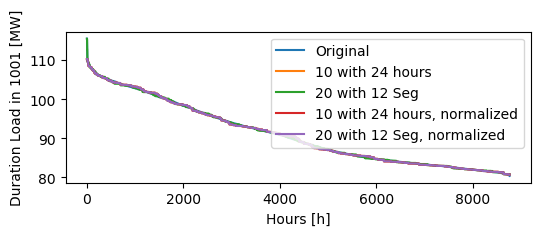

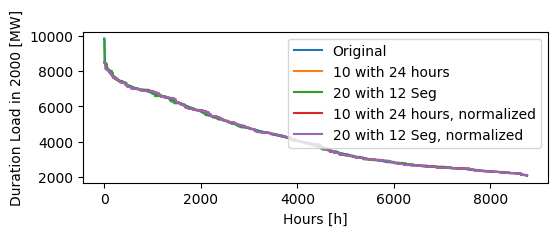

In [69]:
##Comparison of the aggregations for 1001
for region in raw:
    fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
    raw[region].sort_values(ascending=False).reset_index(drop=True).plot(label = 'Original')
    predicted10[region].sort_values(ascending=False).reset_index(drop=True).plot(label = '10 with 24 hours')
    predicted20[region].sort_values(
        ascending=False).reset_index(drop=True).plot(label = '20 with 12 Seg')
    predicted10normed[region].sort_values(
        ascending=False).reset_index(drop=True).plot(label = '10 with 24 hours, normalized')
    predicted20normed[region].sort_values(
        ascending=False).reset_index(drop=True).plot(label = '20 with 12 Seg, normalized')
    plt.legend()
    plt.xlabel('Hours [h]')
    plt.ylabel('Duration Load in ' + region + ' [MW]')



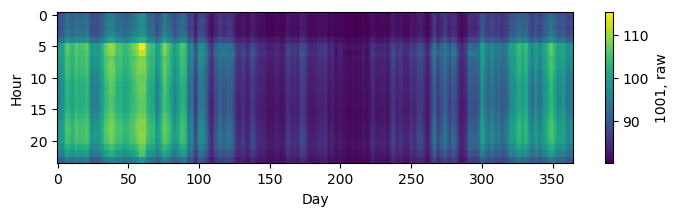

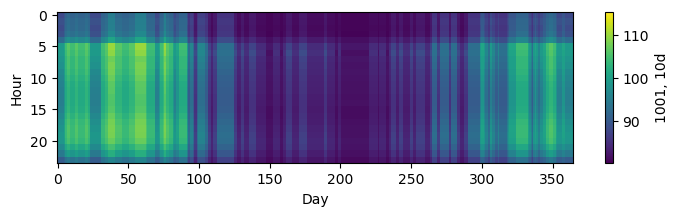

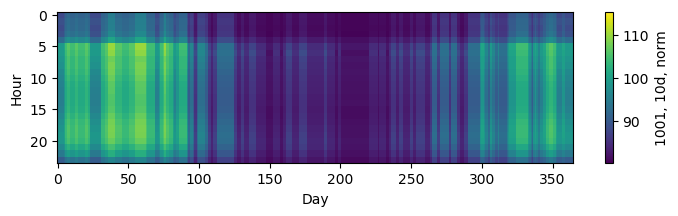

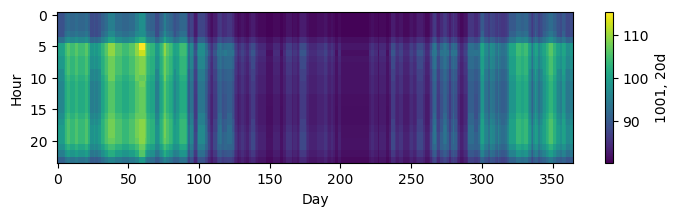

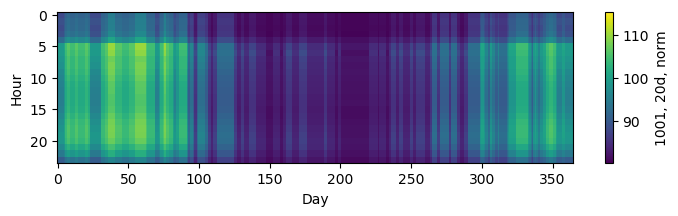

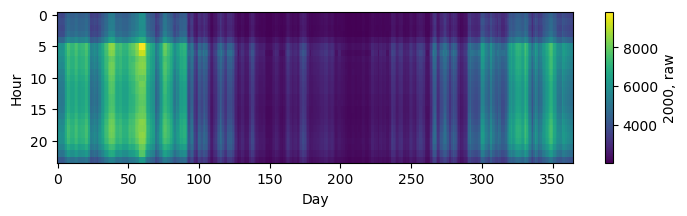

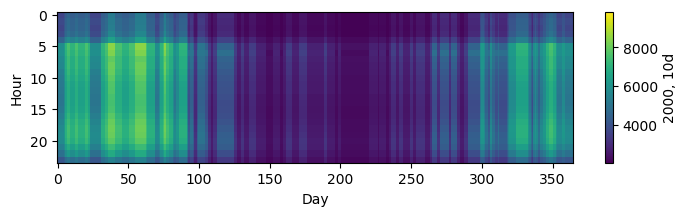

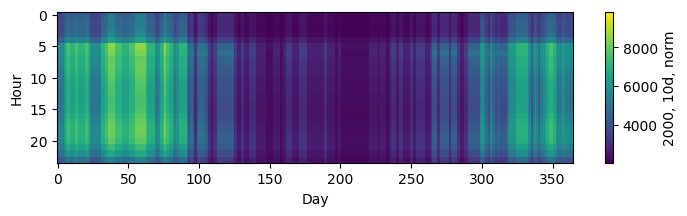

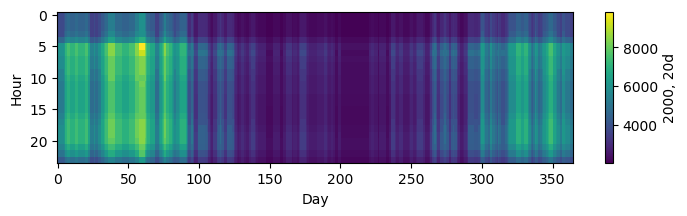

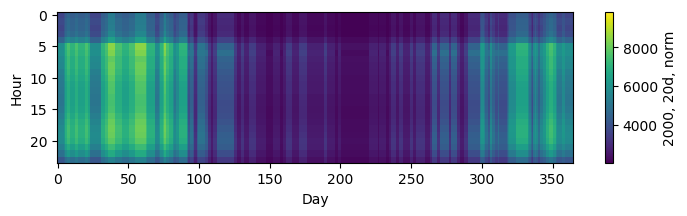

In [70]:
for region in raw:
    param = region
    #Raw data
    plotTS(raw[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param +', raw')
    #aggregation 10 days
    plotTS(predicted10[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param + ', 10d')
    #aggregation 10days, normalized
    plotTS(predicted10normed[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param + ', 10d, norm')
    #aggregation 20days
    plotTS(predicted20[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param + ', 20d')
    #aggregation 20days, normalized
    plotTS(predicted20normed[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param + ', 20d, norm')

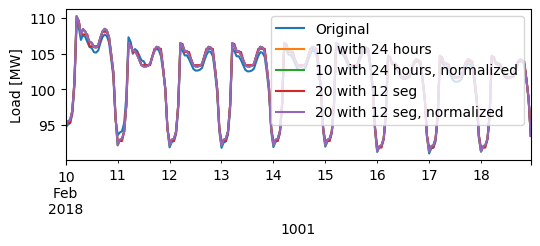

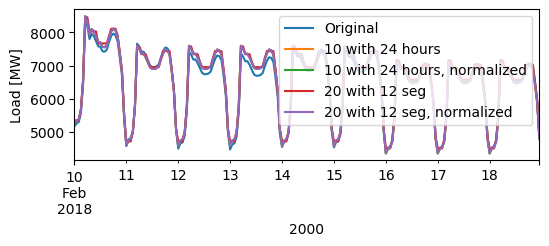

In [71]:
for region in raw:
    fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
    raw[region]['20180210':'20180218'].plot(label = 'Original')
    predicted10[region]['20180210':'20180218'].plot(label = '10 with 24 hours')
    predicted10normed[region]['20180210':'20180218'].plot(label = '10 with 24 hours, normalized')
    predicted20[region]['20180210':'20180218'].plot(label = '20 with 12 seg')
    predicted20normed[region]['20180210':'20180218'].plot(label = '20 with 12 seg, normalized')
    plt.legend()
    plt.ylabel('Load [MW]')
    plt.xlabel(region)

In [72]:
aggregationSeg.createTypicalPeriods()

1001         2000
   Segment Step Segment Duration                         
0  0            3                  91.881061  4501.834892
   1            1                  93.130288  4763.857926
   2            1                  96.626781  5496.830132
   3            2                 104.534082  7153.981627
   4            3                 103.502549  6937.981930
...                                      ...          ...
19 7            4                  89.591092  3211.961216
   8            2                  90.834458  3375.540237
   9            3                  92.102104  3542.458528
   10           1                  89.583557  3211.956195
   11           1                  86.941092  2864.762534

[240 rows x 2 columns]

In [73]:
aggregation.createTypicalPeriods()

1001         2000
  TimeStep                        
0 0         85.432265  3012.459039
  1         86.043741  2962.543760
  2         85.592652  2902.633431
  3         86.073813  2987.501400
  4         88.539765  3581.597172
...               ...          ...
9 19        81.933822  2308.797530
  20        82.174403  2349.847200
  21        82.074161  2332.825630
  22        81.803508  2286.768440
  23        81.262201  2194.654060

[240 rows x 2 columns]

## Pearson correlation

In [74]:
indicatorRaw = {
    name_predicted10: {},
    name_predicted10normed: {},
    name_predicted20: {},
    name_predicted20normed: {}}

for segment in raw:
    indicatorRaw[name_predicted10][segment] = np.corrcoef(raw[segment],predicted10[segment])[0, 1]
    indicatorRaw[name_predicted10normed][segment] = np.corrcoef(raw[segment],predicted10normed[segment])[0, 1]
    indicatorRaw[name_predicted20][segment] = np.corrcoef(raw[segment],predicted20[segment])[0, 1]
    indicatorRaw[name_predicted20normed][segment] = np.corrcoef(raw[segment],predicted20normed[segment])[0, 1]
pd.DataFrame(indicatorRaw)

,10 days:,10 days normalized:,20 days:,20 days normalized:
1001,0.993984,0.993984,0.997073,0.993984
2000,0.992624,0.992624,0.997235,0.992624
